In [1]:
import os

import cartopy.crs as ccrs
import cmocean
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

# Local Utils
sys.path.insert(0, "/glade/work/zespinosa/Projects/climate-utils")
from utils import (
    plot_stationary_sp,
    xarray_monthly_to_time,
    xarray_time_to_monthly,
    detrend_data,
    get_season_anchored
)

In [2]:
SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 24
styles = ["-", "--", "-.", ":", "-"]
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = [15, 10]
plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=SMALL_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc("lines", linewidth=4)
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=plt.cm.Paired.colors)
# colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99']
colors = ['#d1e5f0','#67a9cf','#2166ac', '#fddbc7', '#ef8a62', '#b2182b']
# colors = ['#ffffcc','#c7e9b4','#7fcdbb','#41b6c4','#2c7fb8','#253494']
# colors = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#0c2c84']
figlabels = ["a)", "b)", "c)", "d)", "e)", "f)", "g)", "h)"]

In [3]:
import logging
from dask.distributed import Client

# client = Client(dashboard_address='127.0.0.1:36071', n_workers=16, silence_logs=logging.ERROR) # turn off warnings
client = Client(n_workers=16, silence_logs=logging.ERROR) # turn off warnings
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 16
Total threads: 80,Total memory: 125.47 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:35547,Workers: 16
Dashboard: /proxy/8787/status,Total threads: 80
Started: Just now,Total memory: 125.47 GiB
Comm: tcp://127.0.0.1:43717,Total threads: 5
Dashboard: /proxy/36447/status,Memory: 7.84 GiB
Nanny: tcp://127.0.0.1:39547,


# Bar Chart

In [4]:
root_data  = "/glade/work/zespinosa/data/nsidc/processed/" 
fn = "sia_sie_NSIDC_197901-202302_monthly.nc"

In [5]:
si = xr.open_dataset(os.path.join(root_data, fn))
# si = si.sel(time=np.arange("1985-01", "2023-03", dtype="datetime64[M]"))

In [6]:
si = xarray_time_to_monthly(si.sie)
sianoms = detrend_data(si, 'year')
sianoms = xarray_monthly_to_time(sianoms)
# sianoms.sel(region="total").plot()

In [7]:
sianoms_monthly = xarray_time_to_monthly(sianoms)
sianoms_monthly = sianoms_monthly.sel(region="total")
sianoms_monthly
for i in range(12): 
    temp = sianoms_monthly[:, i].argsort()
    ranks = np.arange(46)[temp.argsort()]
    sianoms_monthly[:, i] = ranks
sianoms_monthly +=1
sianoms_ranks = xarray_monthly_to_time(sianoms_monthly)
# sianoms_monthly.sel(month=2).plot()

In [8]:
sianoms_monthly = xarray_time_to_monthly(sianoms)
# sianoms_monthly.sel(month=2, region="total").plot()

Text(0.5, 0, '')

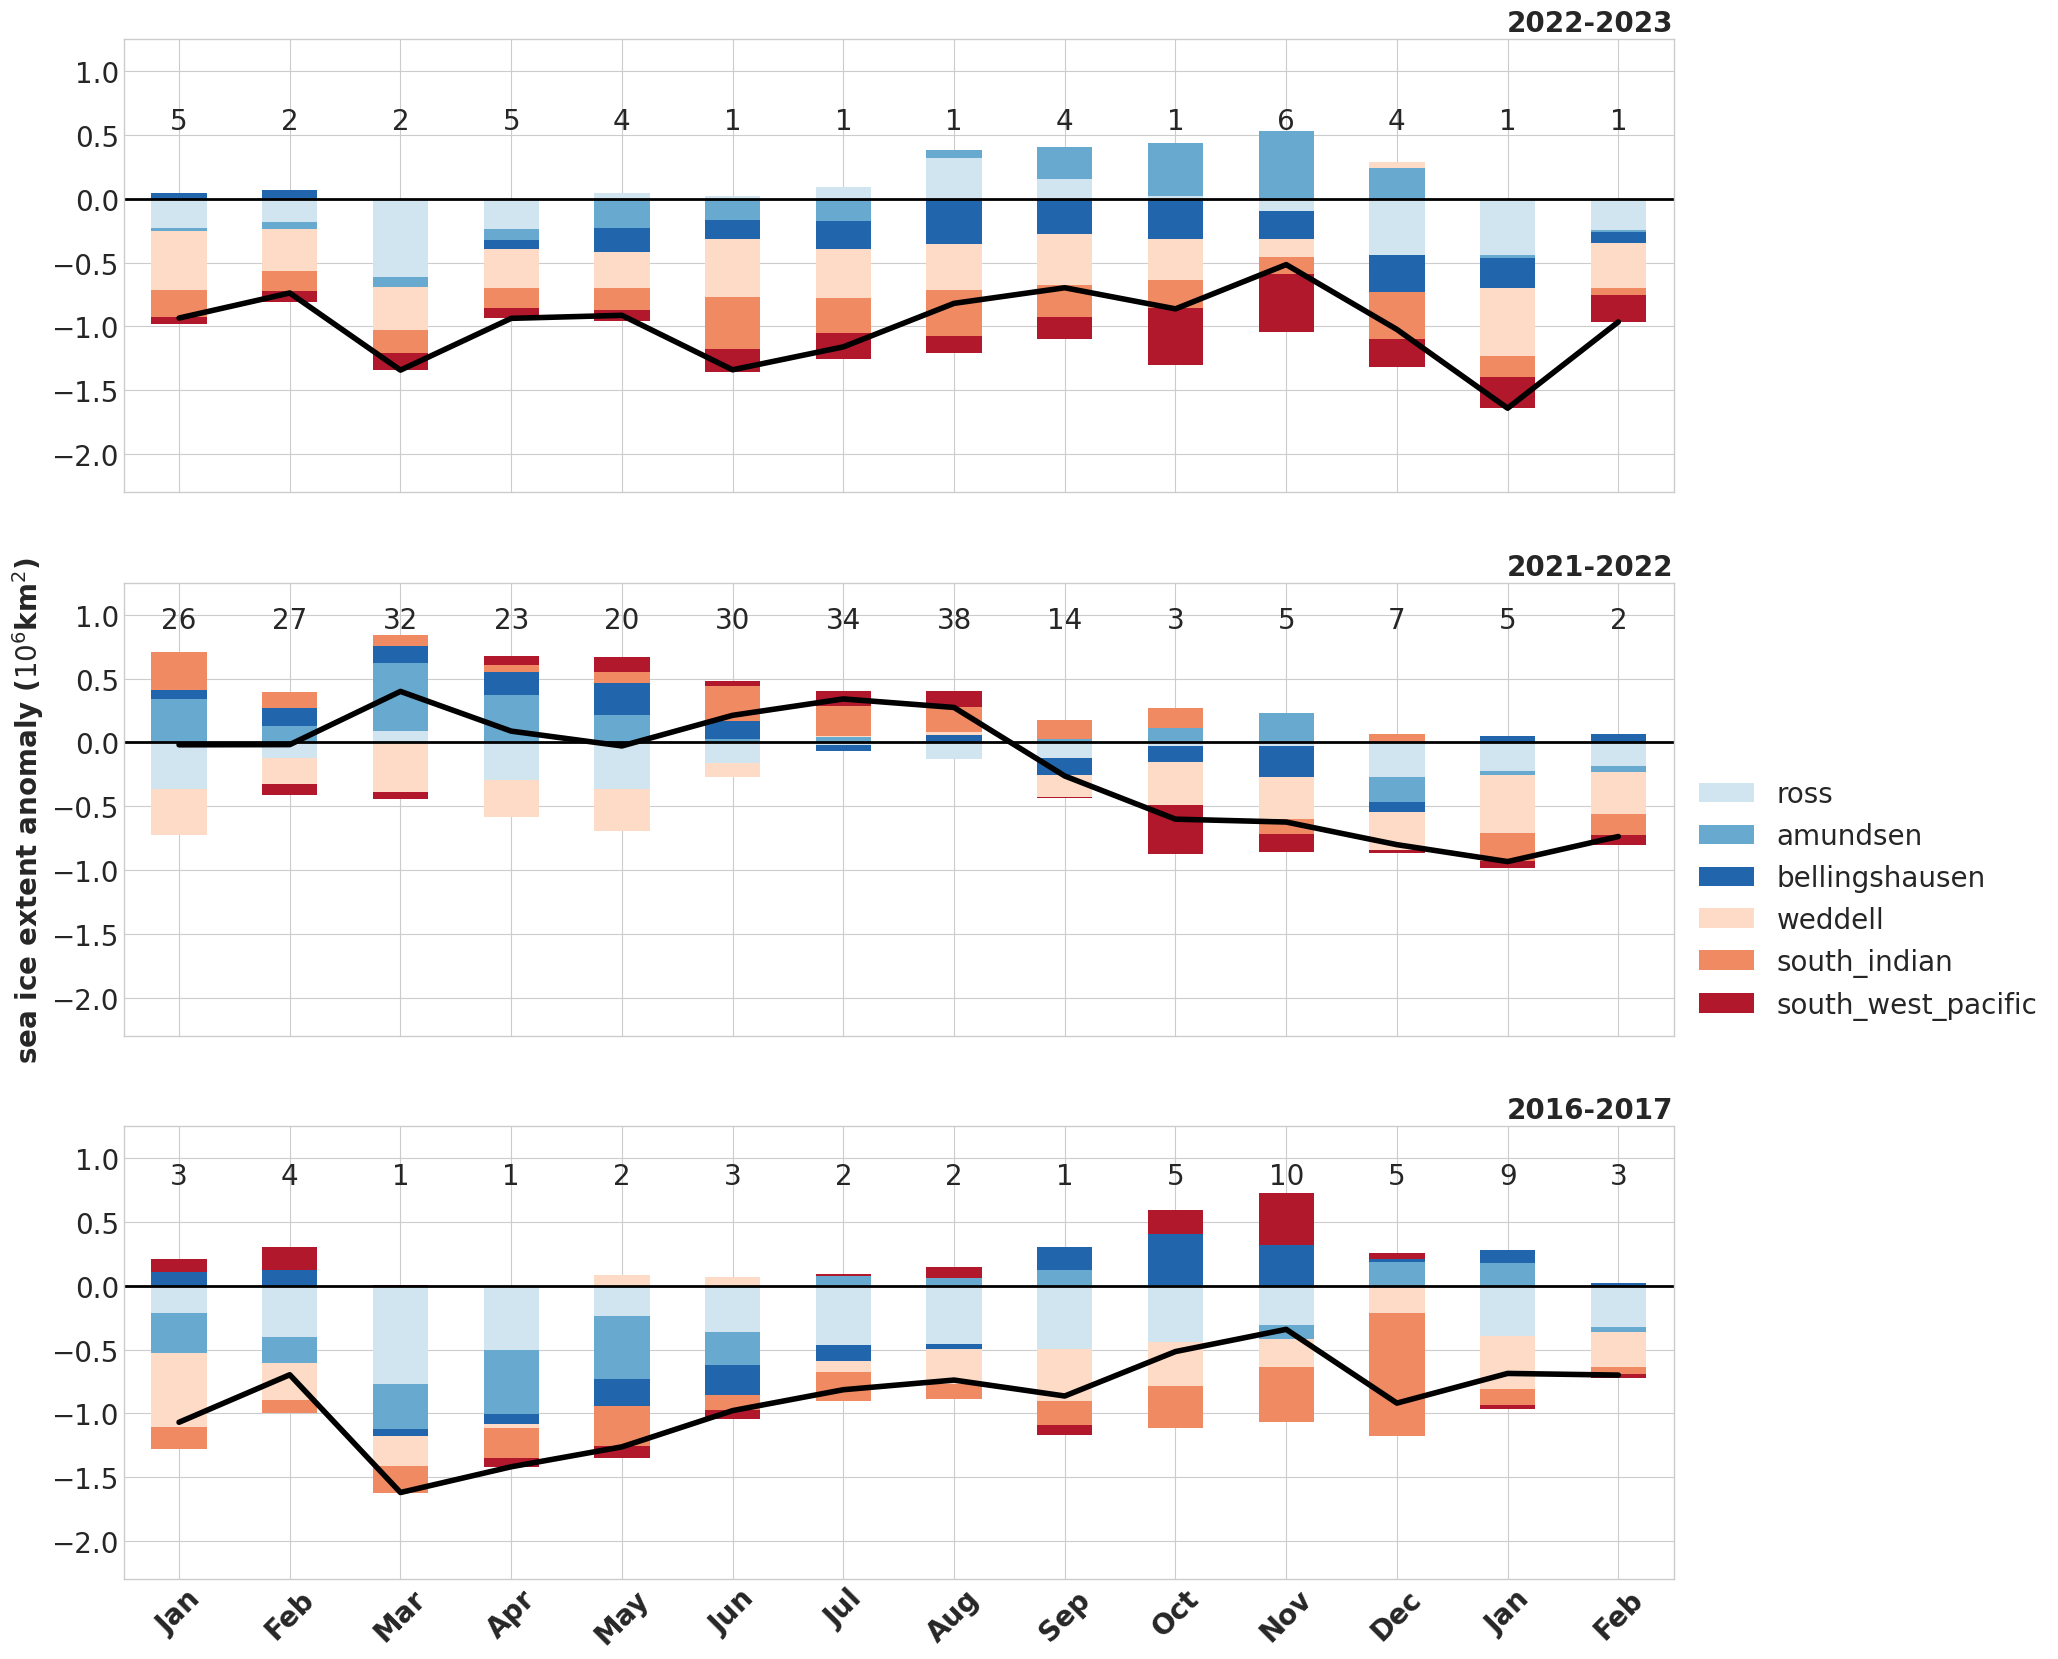

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(20,20), sharex=True)

timeSlice = np.arange("2022-01", "2023-03", dtype="datetime64[M]")
sia2023 = sianoms.sel(time=timeSlice, region=si.region[:-1])
sia2023_total = sianoms.sel(time=timeSlice, region="total")
sia2023.to_pandas().T.plot.bar(ax=ax1, stacked=True, legend=False, color=colors)
ax1.plot(sia2023_total, color="black")
ax1.set_title("2022-2023", loc="right", fontweight="bold")

rects = ax1.patches[:len(timeSlice)]
labels = np.array(sianoms_ranks.sel(time=timeSlice).values, dtype=int)
for rect, label in zip(rects, labels): 
    ax1.text(rect.get_x() + rect.get_width() / 2, .5, label, ha="center", va="bottom")
    

timeSlice = np.arange("2021-01", "2022-03", dtype="datetime64[M]")
sia2022 = sianoms.sel(time=timeSlice, region=si.region[:-1])
sia2022_total = sianoms.sel(time=timeSlice, region="total")
sia2022.to_pandas().T.plot.bar(ax=ax2, stacked=True, legend=False, color=colors)
ax2.plot(sia2022_total, color="black")
ax2.set_title("2021-2022", loc="right", fontweight="bold")

rects = ax2.patches[:len(timeSlice)]
labels = np.array(sianoms_ranks.sel(time=timeSlice).values, dtype=int)
for rect, label in zip(rects, labels): 
    ax2.text(rect.get_x() + rect.get_width() / 2, .85, label, ha="center", va="bottom")

timeSlice = np.arange("2017-01", "2018-03", dtype="datetime64[M]")
sia2017 = sianoms.sel(time=timeSlice, region=si.region[:-1])
sia2017_total = sianoms.sel(time=timeSlice, region="total")
sia2017.to_pandas().T.plot.bar(ax=ax3, stacked=True, legend=False, color=colors)
ax3.plot(sia2017_total, color="black")
ax3.set_title("2016-2017", loc="right", fontweight="bold")

rects = ax3.patches[:len(timeSlice)]
labels = np.array(sianoms_ranks.sel(time=timeSlice).values, dtype=int)
for rect, label in zip(rects, labels): 
    ax3.text(rect.get_x() + rect.get_width() / 2, .75, label, ha="center", va="bottom")

ax1.set_ylim(-2.3, 1.25)
ax2.set_ylim(-2.3, 1.25)
ax3.set_ylim(-2.3, 1.25)

ax1.hlines(0, xmin=-2, xmax=15, linewidth=2, color="black")
ax2.hlines(0, xmin=-2, xmax=15, linewidth=2, color="black")
ax3.hlines(0, xmin=-2, xmax=15, linewidth=2, color="black")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.5))
plt.xticks(ticks=np.arange(len(timeSlice)), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan", "Feb"], rotation=45, fontweight="bold")
ax2.set_ylabel(r"sea ice extent anomaly ($10^6$km$^2$)", fontweight="bold")
plt.xlabel("")
# plt.savefig("figures/stackedbarchart_anomalies.png")

# ERA5 Circulation

In [15]:
root_data = "/glade/scratch/zespinosa/data/ERA5/monthly"
u10 = xr.open_dataset(os.path.join(root_data, "era5_10m_u_component_of_wind_monthly_197901-202212.nc"), chunks='auto').u10
v10 = xr.open_dataset(os.path.join(root_data, "era5_10m_v_component_of_wind_monthly_197901-202212.nc"), chunks='auto').v10
clouds = xr.open_dataset(os.path.join(root_data, "era5_total_cloud_cover_monthly_197901-202212.nc"), chunks='auto').tcc
mslp = xr.open_dataset(os.path.join(root_data, "era5_mean_sea_level_pressure_monthly_197901-202212.nc"), chunks='auto').msl
Tx2m = xr.open_dataset(os.path.join(root_data, "era5_2m_temperature_monthly_197901-202212.nc"), chunks='auto').t2m
sst = xr.open_dataset(os.path.join(root_data, "era5_sea_surface_temperature_monthly_197901-202212.nc"), chunks='auto').sst

def get_anoms(df):
    df = xarray_time_to_monthly(df)
    df = detrend_data(df, 'year')
    return xarray_monthly_to_time(df)

u10 = get_anoms(u10)
v10 = get_anoms(v10)
clouds = get_anoms(clouds)
mslp = get_anoms(mslp)
Tx2m = get_anoms(Tx2m)
sst = get_anoms(sst)

In [16]:
def spatial_era5_plot(dt, title, levels, label, cmap):
    fig, ax = plot_stationary_sp()
    
    # Plot siconc filled contours
    img = ax.contourf(
        dt.longitude,
        dt.latitude,
        dt,
        cmap=cmap,
        extend="both",
        levels=levels,
        transform=ccrs.PlateCarree(), 
    )
    
    cbar = fig.colorbar(img, ax=ax)
    cbar.set_label(label)
    ax.set_title(title)
    fig.set_size_inches(8, 8)

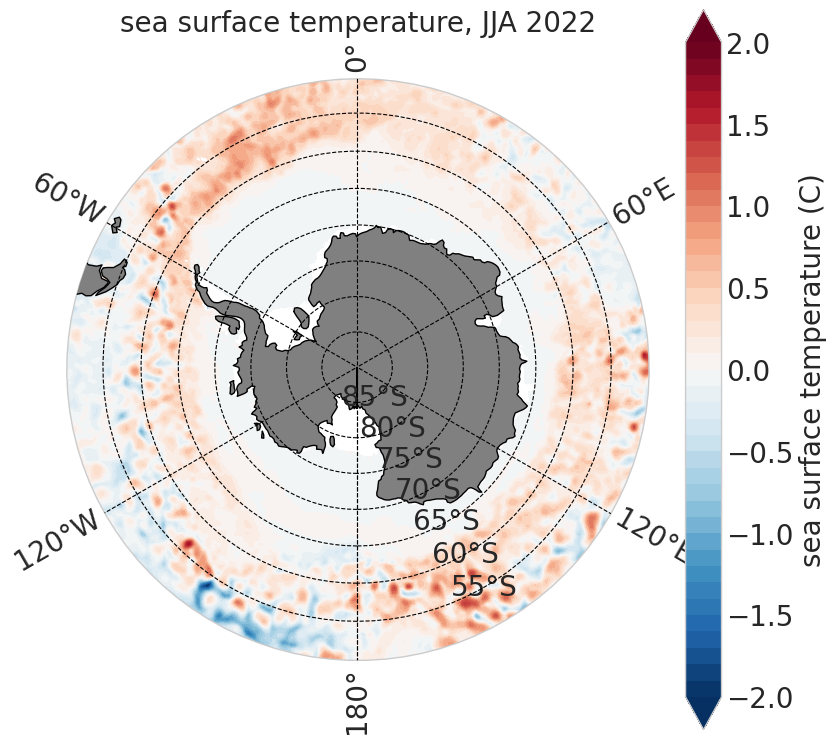

In [18]:
season = "JJA"
da = sst
da_season = get_season_anchored(da, season)
da_season = da_season.sel(year=2023)

spatial_era5_plot(
    dt=da_season, 
    title="sea surface temperature, JJA 2022",
    label="sea surface temperature (C)", 
    cmap="RdBu_r",
    levels=np.arange(-2, 2.1, .1)
)

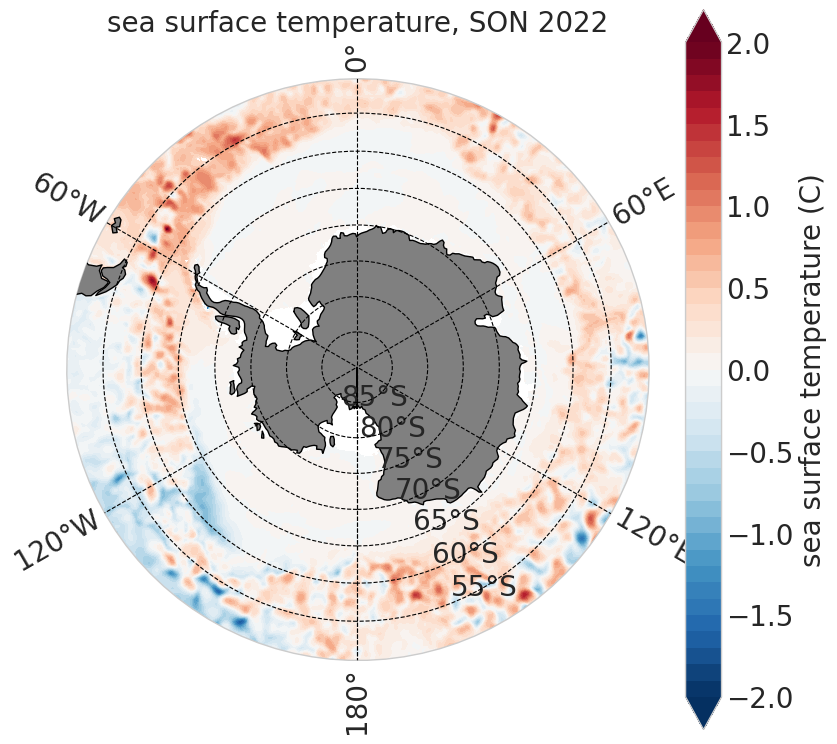

In [19]:
season = "SON"
da = sst
da_season = get_season_anchored(da, season)
da_season = da_season.sel(year=2023)

spatial_era5_plot(
    dt=da_season, 
    title="sea surface temperature, SON 2022",
    label="sea surface temperature (C)", 
    cmap="RdBu_r",
    levels=np.arange(-2, 2.1, .1)
)

# Temperature

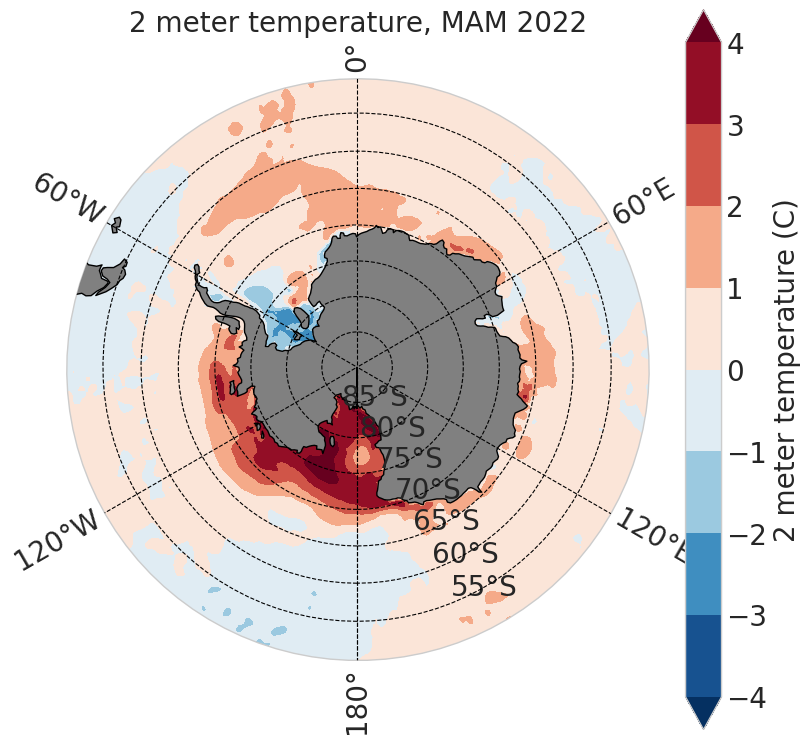

In [12]:
season = "MAM"
da = Tx2m

da_season = get_season_anchored(da, season)
da_season = da_season.sel(year=2023)
# da_season = da_season.sel(time="2022-06").squeeze()

def spatial_era5_temp_plot(dt, title):
    fig, ax = plot_stationary_sp()
    
    # Plot siconc filled contours
    img = ax.contourf(
        dt.longitude,
        dt.latitude,
        dt,
        cmap="RdBu_r",
        extend="both",
        # levels=[-4.5,-3.5,-2.5,-1.5,-.5,.5,1.5,2.5,3.5,4.5],
        levels=np.arange(-4,5,1),
        transform=ccrs.PlateCarree(), 
    )
    
    cbar = fig.colorbar(img, ax=ax)
    cbar.set_label("2 meter temperature (C)")
    ax.set_title(title)
    fig.set_size_inches(8, 8)
    
spatial_era5_temp_plot(da_season, "2 meter temperature, MAM 2022")

## Clouds

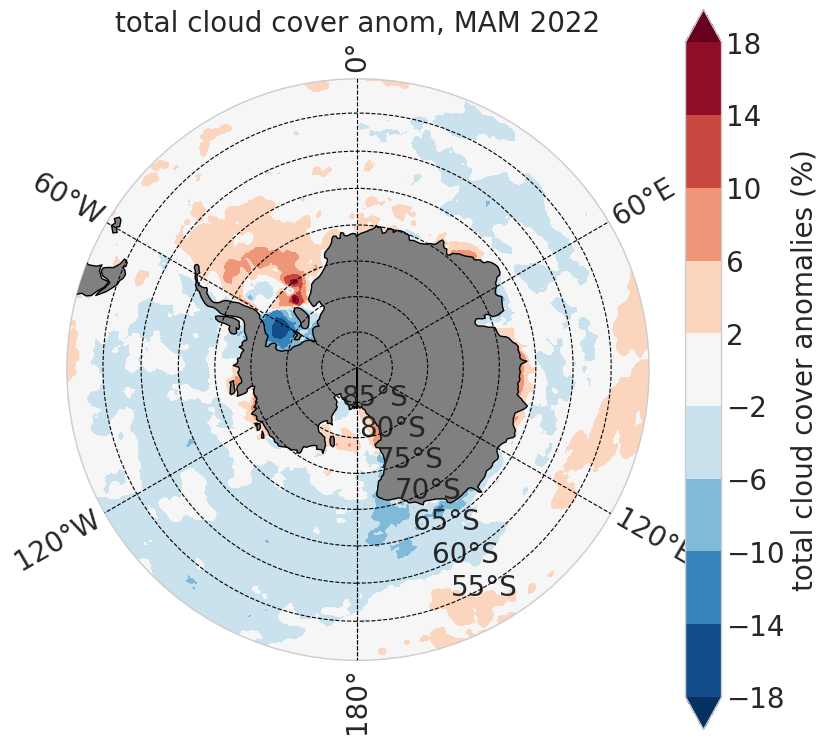

In [292]:
season = "MAM"
da = clouds*100
# da_season = da.sel(time=da.time.dt.season==season)
# da_season = da_season.sel(time="2022-06").squeeze()

da_season = get_season_anchored(da, "MAM")
da_season = da_season.sel(year=2023)

def spatial_era5_clouds_plot(dt, title):
    fig, ax = plot_stationary_sp()
    
    # Plot siconc filled contours
    img = ax.contourf(
        dt.longitude,
        dt.latitude,
        dt,
        cmap="RdBu_r",
        extend="both",
        levels=[-18, -14, -10, -6, -2, 2, 6, 10, 14, 18],
        transform=ccrs.PlateCarree(), 
    )
    
    cbar = fig.colorbar(img, ax=ax)
    cbar.set_label("total cloud cover anomalies (%)")
    ax.set_title(title)
    fig.set_size_inches(8, 8)
    
spatial_era5_clouds_plot(da_season, "total cloud cover anom, MAM 2022")

## SLP and Winds

In [277]:
def spatial_era5_plot(dt, u, v, title):
    fig, ax = plot_stationary_sp()
    # Plot siconc filled contours
    img = ax.contourf(
        dt.longitude,
        dt.latitude,
        dt,
        cmap="RdBu_r",
        extend="both",
        levels=np.arange(-12, 13, 1),
        transform=ccrs.PlateCarree(), 
    )
    ax.quiver(
        x=u.longitude.values,
        y=u.latitude.values, 
        u=u.values, 
        v=v.values, 
        pivot="middle",
        transform=ccrs.PlateCarree()
    )
    
    cbar = fig.colorbar(img, ax=ax)
    cbar.set_label("sea level pressure (hPa)")
    ax.set_title(title)
    fig.set_size_inches(8, 8)

<xarray.DataArray (latitude: 161, longitude: 1440, year: 44)>
array([[[ 2.68592006, -6.04931348, -1.91814076, ...,  2.18670965,
          3.24577299,  3.54257071],
        [ 2.69846575, -6.0227751 , -1.94133366, ...,  2.1837366 ,
          3.27473533,  3.55432781],
        [ 2.71033247, -5.9969353 , -1.96563536, ...,  2.18055723,
          3.3034978 ,  3.56797483],
        ...,
        [ 2.65944089, -6.11225502, -1.85816968, ...,  2.19220022,
          3.15191056,  3.50242819],
        [ 2.66733625, -6.09333288, -1.87694473, ...,  2.19094331,
          3.18433667,  3.51637587],
        [ 2.67614212, -6.07266945, -1.89783519, ...,  2.18913846,
          3.21493626,  3.53018718]],

       [[ 2.71002699, -6.08868997, -1.98001109, ...,  2.12312662,
          3.26703987,  3.55163021],
        [ 2.7215172 , -6.06147642, -2.00246483, ...,  2.12005479,
          3.296332  ,  3.56289568],
        [ 2.73457615, -6.03311148, -2.0237939 , ...,  2.11677922,
          3.32289367,  3.57395604],
...
 

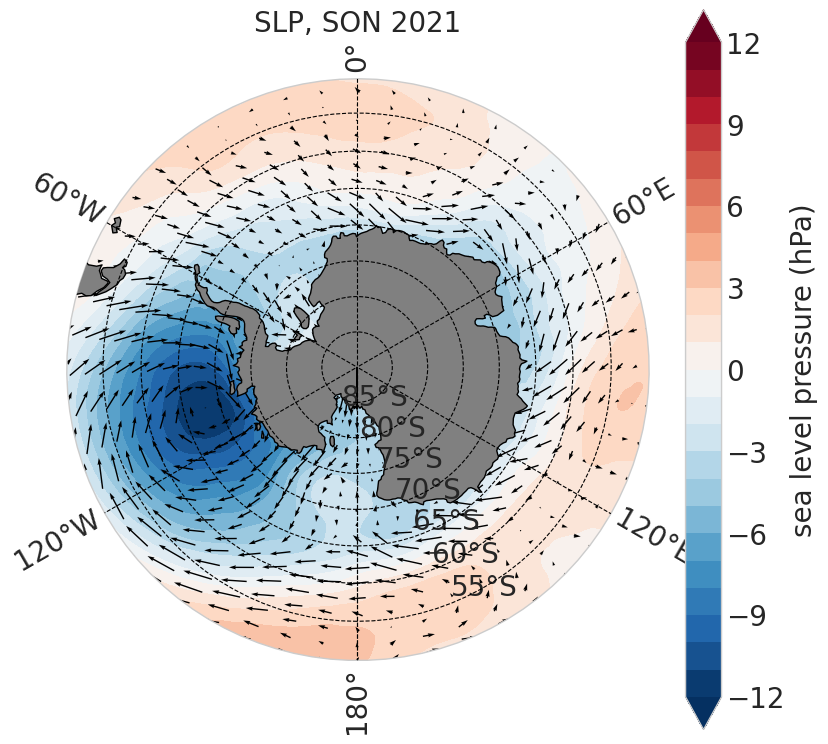

In [285]:
season = "SON"
da = mslp/100
# da_season = da.sel(time=da.time.dt.season==season)
# da_season = da_season.sel(time="2021-09").squeeze()
da_season = get_season_anchored(da, season)
da_season = da_season.sel(year=2022)

# u = u10.sel(time=u10.time.dt.season==season)
# u = u.sel(time="2021-09").squeeze()
# v = v10.sel(time=v10.time.dt.season==season)
# v = v.sel(time="2021-09").squeeze()
# v = v[::8, ::30]

u = get_season_anchored(u10, season)
u = u.sel(year=2022)
u = u[::8, ::30]

v = get_season_anchored(v10, season)
v = v.sel(year=2022)
v = v[::8, ::30]
v
spatial_era5_plot(da_season, u, v, "SLP, SON 2021")

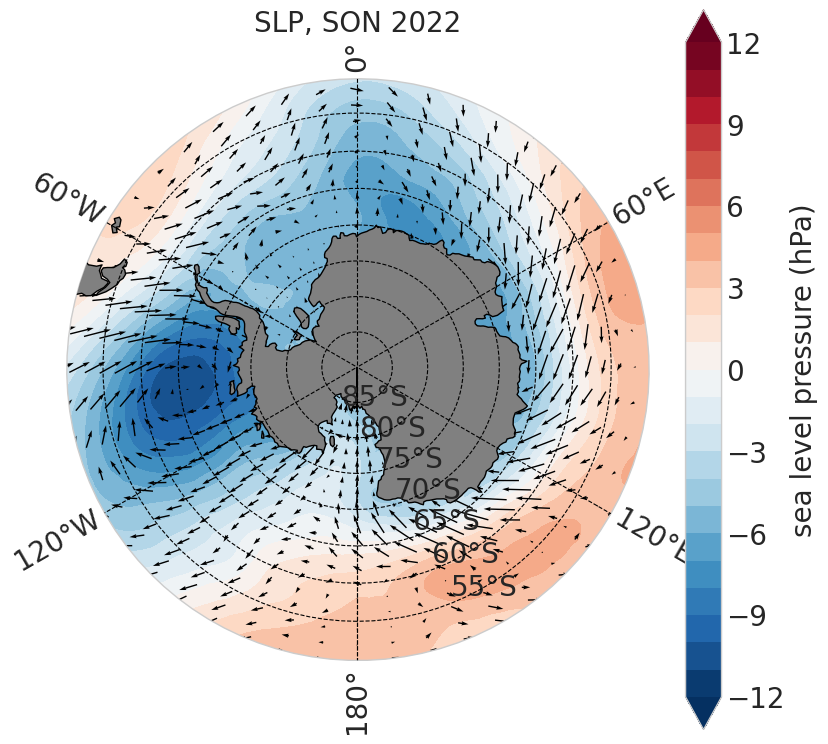

In [286]:
season = "SON"
da = mslp/100
# da_season = da.sel(time=da.time.dt.season==season)
# da_season = da_season.sel(time="2022-09").squeeze()
# u = u10.sel(time=u10.time.dt.season==season)
# u = u.sel(time="2022-09").squeeze()
# u = u[::8, ::30]

# v = v10.sel(time=v10.time.dt.season==season)
# v = v.sel(time="2022-09").squeeze()
# v = v[::8, ::30]

da_season = get_season_anchored(da, season)
da_season = da_season.sel(year=2023)

u = get_season_anchored(u10, season)
u = u.sel(year=2023)
u = u[::8, ::30]

v = get_season_anchored(v10, season)
v = v.sel(year=2023)
v = v[::8, ::30]

spatial_era5_plot(da_season, u, v, "SLP, SON 2022")

/glade/work/zespinosa/conda-envs/cenv/lib/python3.8/site-packages/cartopy/crs.py:529: UserWarning: Some vectors at source domain corners may not have been transformed correctly
  warnings.warn('Some vectors at source domain corners '


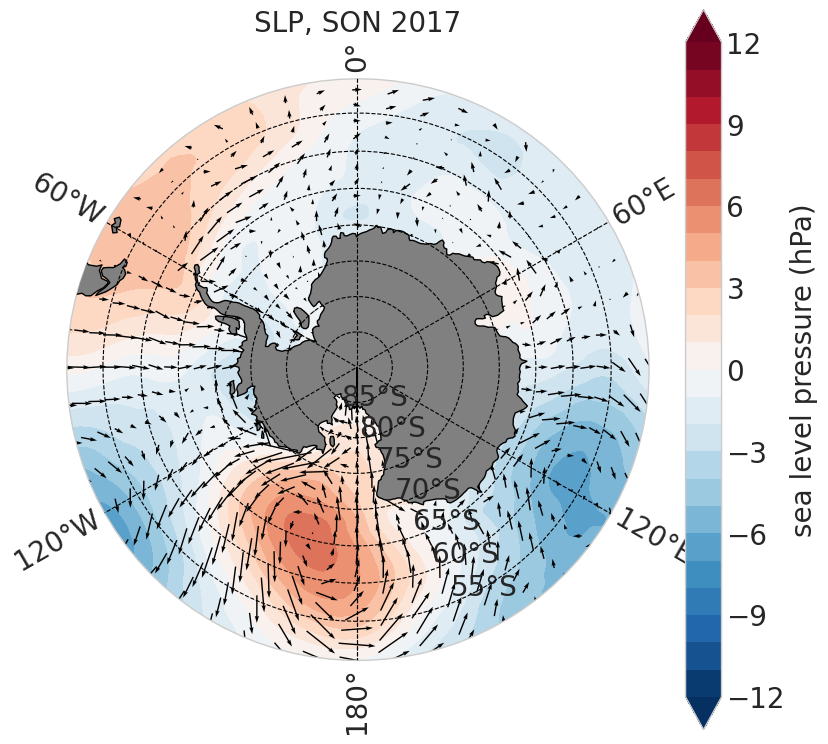

In [287]:
season = "SON"
da = mslp/100

# da_season = da.sel(time=da.time.dt.season==season)
# da_season = da_season.sel(time="2016-09").squeeze()
# u = u10.sel(time=u10.time.dt.season==season)
# u = u.sel(time="2016-09").squeeze()
# u = u[::8, ::30]

# v = v10.sel(time=v10.time.dt.season==season)
# v = v.sel(time="2016-09").squeeze()
# v = v[::8, ::30]

da_season = get_season_anchored(da, season)
da_season = da_season.sel(year=2017)

u = get_season_anchored(u10, season)
u = u.sel(year=2017)
u = u[::8, ::30]

v = get_season_anchored(v10, season)
v = v.sel(year=2017)
v = v[::8, ::30]

spatial_era5_plot(da_season, u, v, "SLP, SON 2017")

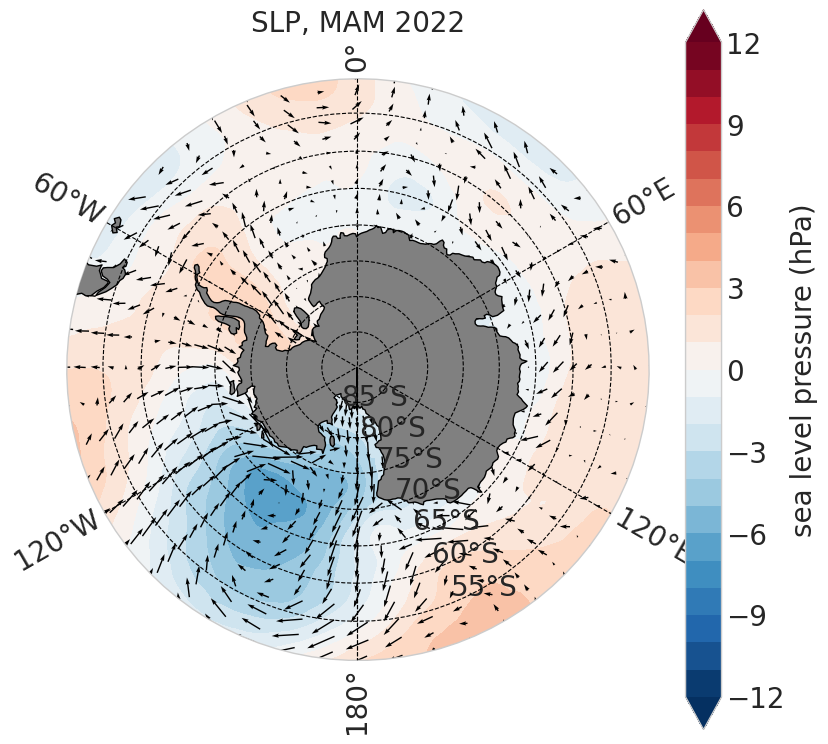

In [291]:
season = "MAM"
da = mslp/100
# da_season = da.sel(time=da.time.dt.season==season)
# da_season = da_season.sel(time="2022-06").squeeze()

# u = u10.sel(time=u10.time.dt.season==season)
# u = u.sel(time="2022-06").squeeze()
# u = u[::8, ::30]

# v = v10.sel(time=v10.time.dt.season==season)
# v = v.sel(time="2022-06").squeeze()
# v = v[::8, ::30]

da_season = get_season_anchored(da, season)
da_season = da_season.sel(year=2023)

u = get_season_anchored(u10, season)
u = u.sel(year=2023)
u = u[::8, ::30]

v = get_season_anchored(v10, season)
v = v.sel(year=2023)
v = v[::8, ::30]

v
spatial_era5_plot(da_season, u, v, "SLP, MAM 2022")

# Sea Ice Anomalies

In [182]:
root_data  = "/glade/work/zespinosa/data/nsidc/processed/" 
fn = "siconc_NSIDC_197901-202302.nc"

In [183]:
siconc = xr.open_dataset(os.path.join(root_data, fn)).cdr_seaice_conc_monthly
siconcAnoms = xarray_time_to_monthly(siconc)
siconcAnoms = detrend_data(siconcAnoms, "year")
siconcAnoms = xarray_monthly_to_time(siconcAnoms)

In [196]:
def spatial_plot(siconc, title):
    fig, ax = plot_stationary_sp()
    
    img = ax.contourf(
        siconc.longitude.values, 
        siconc.latitude.values,
        siconc*100,
        transform=ccrs.SouthPolarStereo(),
        cmap="RdBu_r",
        levels=np.arange(-50,55,5),
        extend="both"
    )
    cbar2 = fig.colorbar(img, ax=ax)
    ax.set_title(title)
    fig.set_size_inches(8,8)

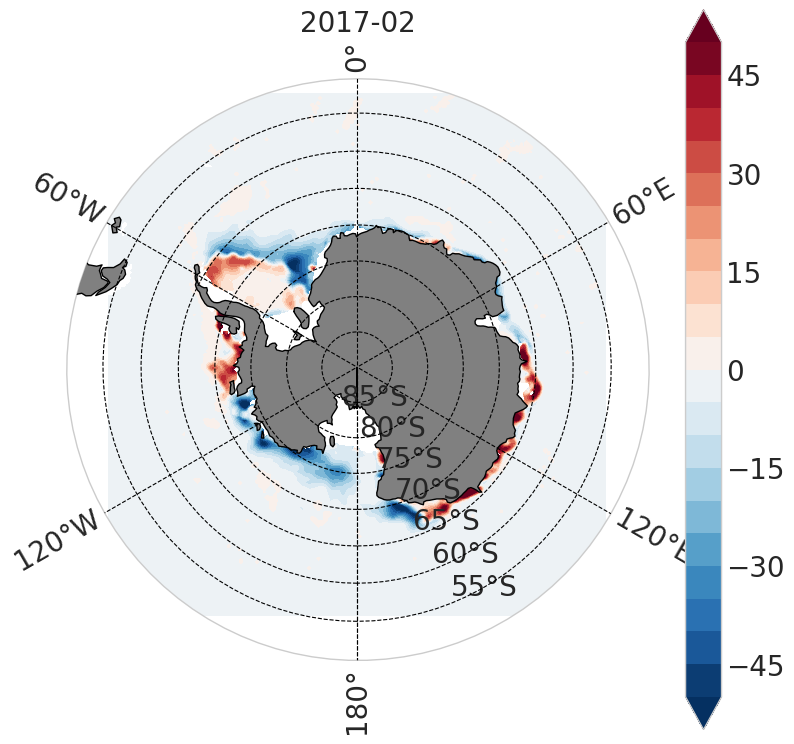

In [204]:
time = "2017-02"
spatial_plot(
    siconc=siconcAnoms.sel(time=time).squeeze(),
    title=time
)

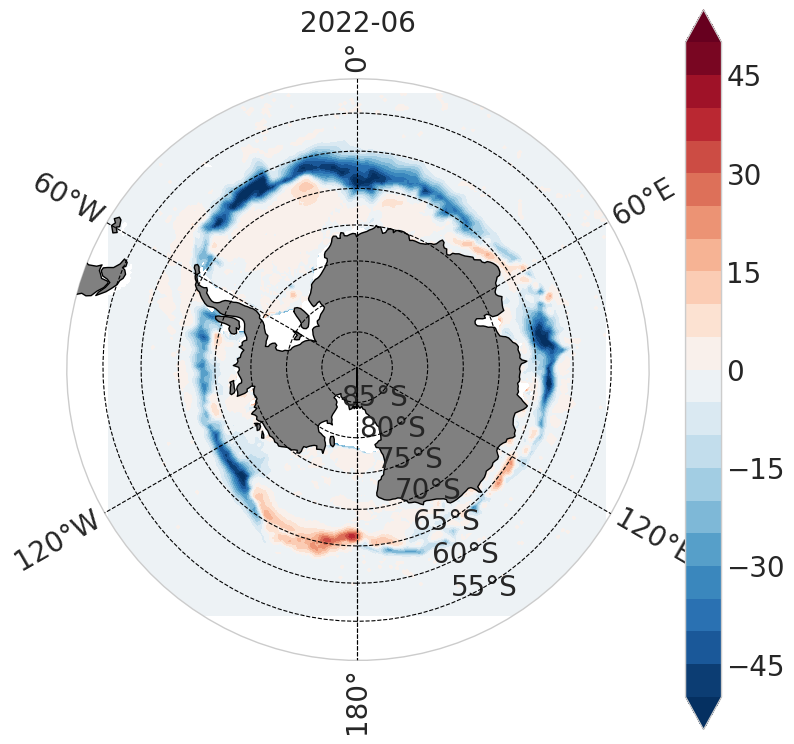

In [197]:
time = "2022-06"
spatial_plot(
    siconc=siconcAnoms.sel(time=time).squeeze(),
    title=time
)

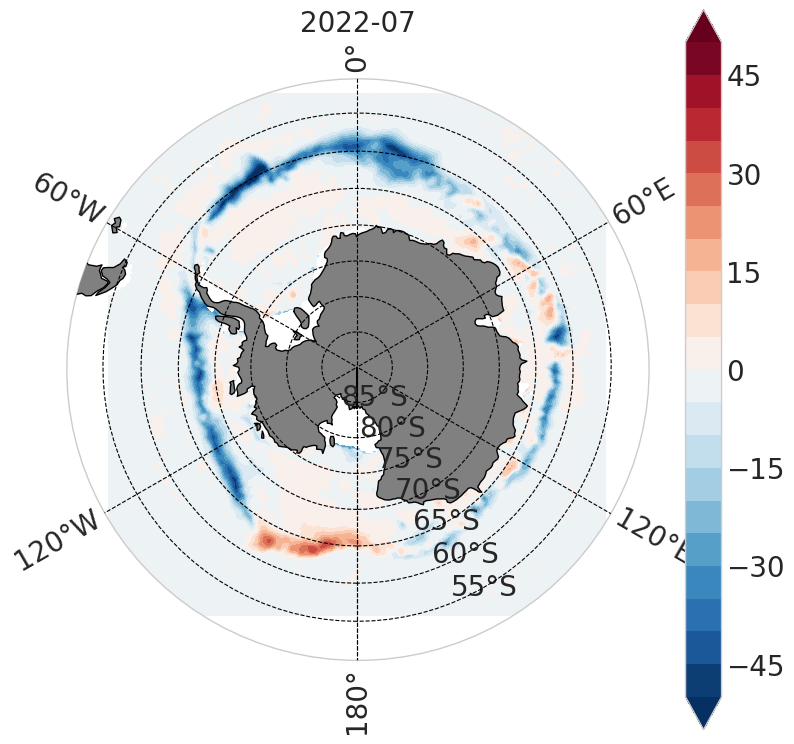

In [198]:
time = "2022-07"
spatial_plot(
    siconc=siconcAnoms.sel(time=time).squeeze(),
    title=time
)

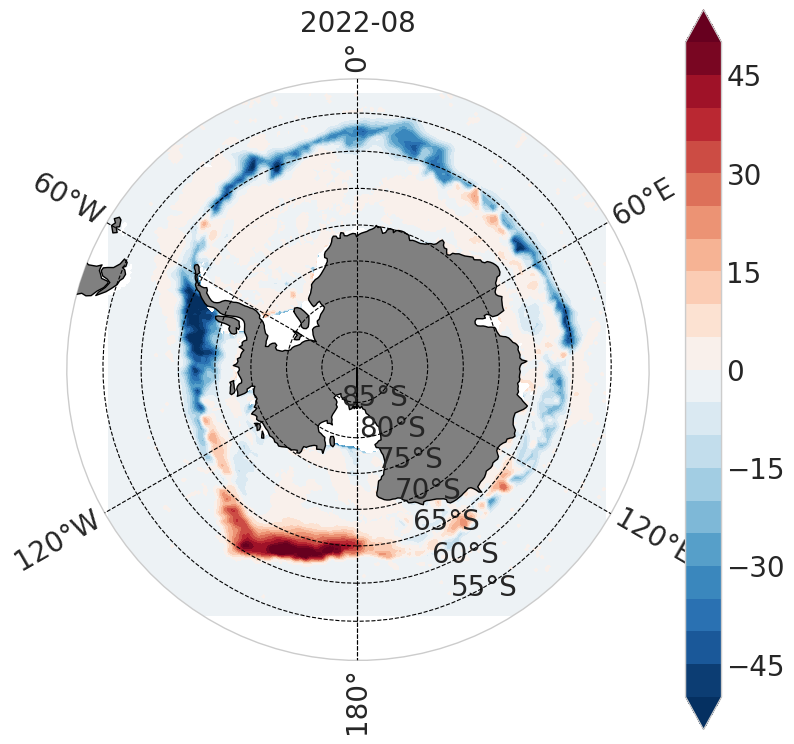

In [199]:
time = "2022-08"
spatial_plot(
    siconc=siconcAnoms.sel(time=time).squeeze(),
    title=time
)